In [1]:
# adopted from https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [2]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
categorical_features = ['bidang_usaha']
continuous_features = ['pendapatan_tahunan','usia_perusahaan','jumlah_karyawan']

In [4]:
data = pd.read_csv('cluster_konsumen.csv')
data.head()

,id,pendapatan_tahunan,bidang_usaha,usia_perusahaan,jumlah_karyawan
0,1,1000,transportasi,10,200
1,2,0,pemerintahan,40,1000
2,3,200,perdagangan,2,50
3,4,500,perdagangan,5,100
4,5,75,transportasi,3,150


In [5]:
data.drop(["id"], axis = 1, inplace=True)
data.head()


,pendapatan_tahunan,bidang_usaha,usia_perusahaan,jumlah_karyawan
0,1000,transportasi,10,200
1,0,pemerintahan,40,1000
2,200,perdagangan,2,50
3,500,perdagangan,5,100
4,75,transportasi,3,150


In [6]:
data.iloc[:,1:].head()

,bidang_usaha,usia_perusahaan,jumlah_karyawan
0,transportasi,10,200
1,pemerintahan,40,1000
2,perdagangan,2,50
3,perdagangan,5,100
4,transportasi,3,150


In [7]:
data[continuous_features].describe()

,pendapatan_tahunan,usia_perusahaan,jumlah_karyawan
count,149.000000,149.000000,149.000000
mean,11985.899329,12.778523,2283.348993
std,7951.453735,7.310531,3125.056799
min,0.000000,1.000000,1.000000
25%,5259.000000,7.000000,50.000000
50%,12214.000000,12.000000,332.000000
75%,19519.000000,19.000000,4449.000000
max,25000.000000,40.000000,9913.000000


In [8]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,pendapatan_tahunan,usia_perusahaan,jumlah_karyawan,bidang_usaha_jasa,bidang_usaha_layanan,bidang_usaha_pemerintahan,bidang_usaha_perdagangan,bidang_usaha_produksi,bidang_usaha_transportasi
0,1000,10,200,0,0,0,0,0,1
1,0,40,1000,0,0,1,0,0,0
2,200,2,50,0,0,0,1,0,0
3,500,5,100,0,0,0,1,0,0
4,75,3,150,0,0,0,0,0,1


In [9]:
mms = MinMaxScaler()
mms.fit(data.iloc[:,1:])
data_transformed = mms.transform(data.iloc[:,1:])

In [10]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

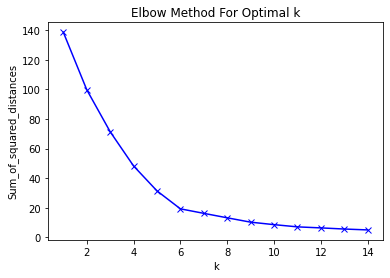

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
k_means = KMeans(n_clusters=6)
k_means.fit(data_transformed)

KMeans(n_clusters=6)

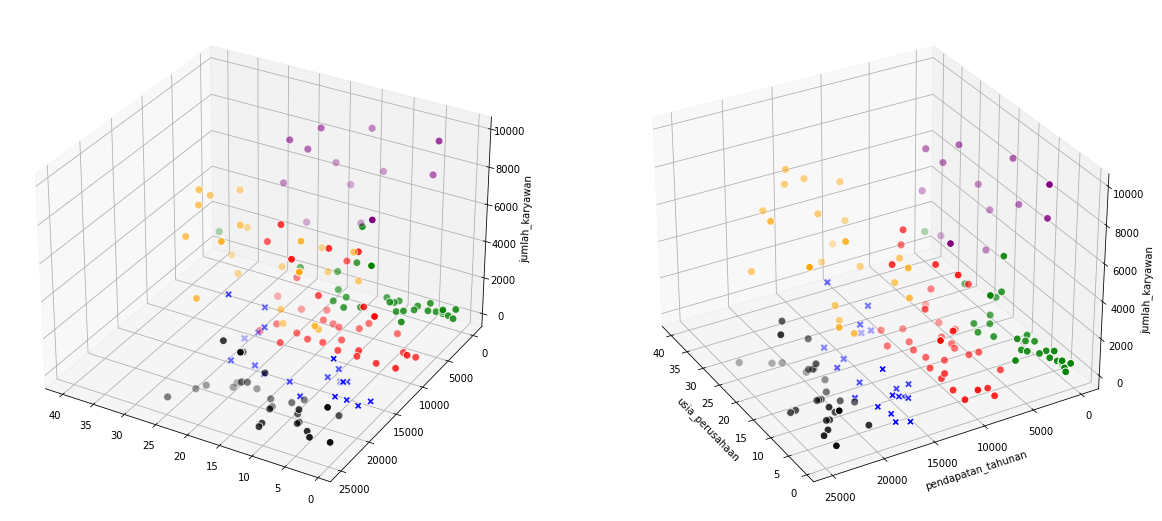

In [19]:
clusters = k_means.fit_predict(data)
data["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data.usia_perusahaan[data.label == 0], data["pendapatan_tahunan"][data.label == 0], data["jumlah_karyawan"][data.label == 0], c='blue', s=60, edgecolors='white', marker='X')
ax.scatter(data.usia_perusahaan[data.label == 1], data["pendapatan_tahunan"][data.label == 1], data["jumlah_karyawan"][data.label == 1], c='red', s=60, edgecolors='white', marker='o')
ax.scatter(data.usia_perusahaan[data.label == 2], data["pendapatan_tahunan"][data.label == 2], data["jumlah_karyawan"][data.label == 2], c='green', s=60, edgecolors='white', marker='o')
ax.scatter(data.usia_perusahaan[data.label == 3], data["pendapatan_tahunan"][data.label == 3], data["jumlah_karyawan"][data.label == 3], c='orange', s=60, edgecolors='white', marker='o')
ax.scatter(data.usia_perusahaan[data.label == 4], data["pendapatan_tahunan"][data.label == 4], data["jumlah_karyawan"][data.label == 4], c='purple', s=60, edgecolors='white', marker='o')
ax.scatter(data.usia_perusahaan[data.label == 5], data["pendapatan_tahunan"][data.label == 5], data["jumlah_karyawan"][data.label == 5], c='black', s=60, edgecolors='white', marker='o')
ax.view_init(30, 120)
ax.set_zlabel('jumlah_karyawan')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data.usia_perusahaan[data.label == 0], data["pendapatan_tahunan"][data.label == 0], data["jumlah_karyawan"][data.label == 0], c='blue', s=60, edgecolors='white', marker='X')
ax2.scatter(data.usia_perusahaan[data.label == 1], data["pendapatan_tahunan"][data.label == 1], data["jumlah_karyawan"][data.label == 1], c='red', s=60, edgecolors='white', marker='o')
ax2.scatter(data.usia_perusahaan[data.label == 2], data["pendapatan_tahunan"][data.label == 2], data["jumlah_karyawan"][data.label == 2], c='green', s=60, edgecolors='white', marker='o')
ax2.scatter(data.usia_perusahaan[data.label == 3], data["pendapatan_tahunan"][data.label == 3], data["jumlah_karyawan"][data.label == 3], c='orange', s=60, edgecolors='white', marker='o')
ax2.scatter(data.usia_perusahaan[data.label == 4], data["pendapatan_tahunan"][data.label == 4], data["jumlah_karyawan"][data.label == 4], c='purple', s=60, edgecolors='white', marker='o')
ax2.scatter(data.usia_perusahaan[data.label == 5], data["pendapatan_tahunan"][data.label == 5], data["jumlah_karyawan"][data.label == 5], c='black', s=60, edgecolors='white', marker='o')
ax2.view_init(30,150)
ax2.set_zlabel('jumlah_karyawan')

plt.xlabel("usia_perusahaan")
plt.ylabel("pendapatan_tahunan")

plt.show()